# DS-SF-30 | Codealong 05: k-Nearest Neighbors

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-iris.csv'))

In [28]:
df[df['Species'] == 'Versicolor'].describe()
df[df['Species'] == 'Versicolor'].describe()






AttributeError: 'Series' object has no attribute 'group_by'

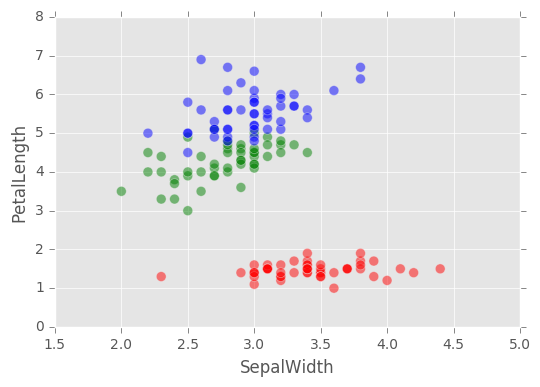

In [29]:
plt.scatter(df["SepalWidth"], df["PetalLength"], s=50, c=color, alpha=0.5)
plt.xlabel("SepalWidth")
plt.ylabel("PetalLength")

## Part A - Activity | Iris dataset: Exploratory Data Analysis

In [15]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

In [16]:
# TODO

color

0       red
1       red
2       red
3       red
4       red
       ... 
145    blue
146    blue
147    blue
148    blue
149    blue
Name: Species, dtype: object

## Part B - Hand-coded classifier

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4f1210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122b06910>]], dtype=object)

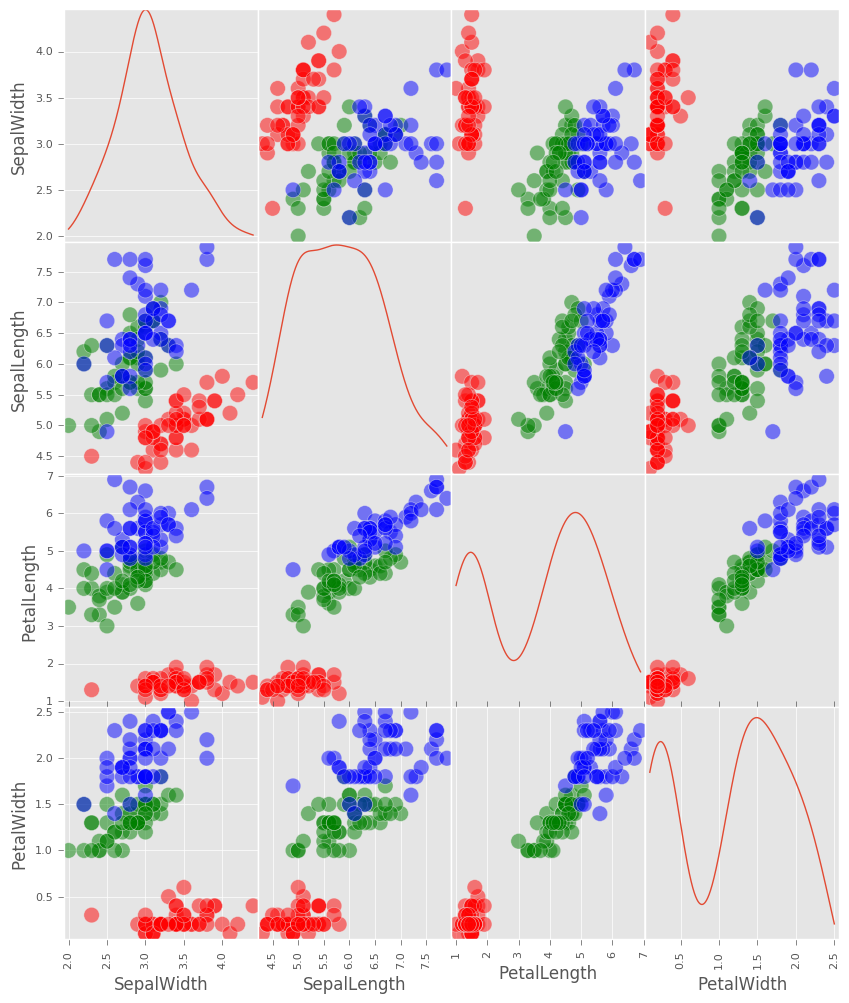

In [37]:
pd.tools.plotting.scatter_matrix(df[ ['SepalWidth', 'SepalLength','PetalLength','PetalWidth' ] ], diagonal = 'kde', c= color, s = 500, figsize = (10, 12))

In [38]:
c = df.Species

In [40]:
row = df.iloc[0]

In [39]:
def my_first_classifier(row):
    if 
    
    # TODO


IndentationError: expected an indented block (<ipython-input-39-b2413bc5887f>, line 2)

In [41]:
row

SepalLength       5.1
SepalWidth        3.5
PetalLength       1.4
PetalWidth        0.2
Species        Setosa
Name: 0, dtype: object

In [52]:
def my_first_classifier(row):
    if row.PetalWidth < 0.75:
        return 'Setosa'
    elif row.PetalLength > 5.0:
        return 'Virginica'
    else:
        return 'Versicolor'

In [54]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145     Virginica
146    Versicolor
147     Virginica
148     Virginica
149     Virginica
dtype: object

In [55]:
(c_hat != c).sum()

10

In [57]:
pd.crosstab(c_hat, c)

Species,Setosa,Versicolor,Virginica
row_0,,,
Setosa,50,0,0
Versicolor,0,49,9
Virginica,0,1,41


## Part C - Classification metrics

### Accuracy

In [59]:
# TODO

(c == c_hat).mean()

0.93333333333333335

### Misclassification rate

In [60]:
# TODO

(c != c_hat).mean()



0.066666666666666666

## Part D - k-Nearest Neighbors (k-NN)

### Feature matrix and response vector

In [61]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [62]:
X

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ],
       [ 0.30555556,  0.70833333,  0.08474576,  0.04166667],
       [ 0.13888889,  0.58333333,  0.10169492,  0.04166667],
       [ 0.13888889,  0.41666667,  0.06779661,  0.        ],
       [ 0.        ,  0.41666667,  0.01694915,  0.        ],
       [ 0.41666667,  0.83333333,  0.03389831,  0.04166667],
       [ 0.38888889,  1.        ,  0.08474576,  0.125     ],
       [ 0.30555556,  0.

In [64]:
c = df.Species

In [65]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

In [75]:
model = neighbors.KNeighborsClassifier(n_neighbors = 2).\
    fit(X, c)

You can measure the precision of your prediction with `.score()`

In [76]:
model.score(X, c)

0.97333333333333338

In [77]:
c_hat = model.predict(X)

In [78]:
(c_hat == c).mean()

0.97333333333333338

In [72]:
pd.crosstab(c, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,50,0
Virginica,0,0,50


### Train/test sets

50% of the dataset to train the model; the rest to test the model

In [79]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [80]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Virginica
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica


In [81]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [83]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

In [84]:
# TODO

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

#scaler = preprocessing.MinMaxScaler().fit(test_X)
test_X = scaler.transform(test_X)

test_c = test_df.Species

In [85]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
)

gs.fit(train_X, train_c)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=75, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [86]:
gs.grid_scores_

[mean: 0.90667, std: 0.12365, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.88000, std: 0.14847, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.88000, std: 0.17588, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.92000, std: 0.09798, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.88000, std: 0.14236, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.85333, std: 0.22862, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.90667, std: 0.12365, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.85333, std: 0.19505, para

In [87]:
gs.best_score_

0.92000000000000004

In [88]:
gs.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [89]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [90]:
gs.score(train_X, train_c)

1.0

In [91]:
gs.score(test_X, test_c)

0.97333333333333338

## Final model

In [ ]:
# TODO